# Descriptive Statistics

Tasks:

1. Obtain the minimum, maximum, mean and standard deviation of each water quality parameter within each managed area.
2. Plot histograms for water quality parameters within each managed area.

* [1.Data Preprocess](#reg_preprocessing)
    * [1.1 Preset Parameters](#preset)
* [2. Descriptive Statistics](#reg_statistics)
    * [2.1 Charlotte Harbor](#reg_result_st_ch)
    * [2.2 Estero Bay](#reg_result_st_eb)
    * [2.3 Big Bend](#reg_result_st_bb)
    * [2.4 Biscayne Bay Aquatic Preserve](#reg_result_st_bbay)
    * [2.5 Guana Tolomato](#reg_result_st_gtm)
* [3. Plot Histogram](#reg_histogram)
    * [3.1 Charlotte Harbor](#reg_result_his_ch)
    * [3.2 Estero Bay](#reg_result_his_eb)
    * [3.3 Big Bend](#reg_result_his_bb)
    * [3.4 Biscayne Bay Aquatic Preserve](#reg_result_his_bbay)
    * [3.5 Guana Tolomato](#reg_result_his_gtm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preprocessing <a class="anchor" id="preprocessing"></a>
Define the water quality parameter folders

In [3]:
# path = '/Users/cong/Downloads/WaterQualityProject/SEACAR_WQ_Pilot-selected/'

path = "C:/projects/SEACAR_WQ_Pilot/"
dfAll_orig = pd.read_csv(path + r"all_0214.csv", low_memory=False)

In [4]:
dfAll_orig.head()

,Unnamed: 0.1,Unnamed: 0,RowID,ParameterName,ParameterUnits,ProgramLocationID,ActivityType,ManagedAreaName,SampleDate,Year,Month,ResultValue,ValueQualifier,Latitude_DD,Longitude_DD,timestamp
0,0,1869,107,Dissolved Oxygen,mg/L,GTMDNNUT,Field,Guana Tolomato Matanzas National Estuarine Res...,Jul 20 2017 8:42AM,2017,7,0.07,NaN,30.023197,-81.328333,2017-07-20 08:42:00
1,1,1870,109,Dissolved Oxygen,mg/L,GTMDNNUT,Field,Guana Tolomato Matanzas National Estuarine Res...,Aug 3 2017 10:16AM,2017,8,4.73,NaN,30.023197,-81.328333,2017-08-03 10:16:00
2,2,1871,171,Dissolved Oxygen,mg/L,GTMMKNUT,Field,Guana Tolomato Matanzas National Estuarine Res...,Dec 13 2017 3:15PM,2017,12,10.32,NaN,30.160736,-81.360278,2017-12-13 15:15:00
3,3,1872,172,Dissolved Oxygen,mg/L,GTMMKNUT,Field,Guana Tolomato Matanzas National Estuarine Res...,Jan 17 2018 1:46PM,2018,1,10.61,NaN,30.160736,-81.360278,2018-01-17 13:46:00
4,4,1873,173,Dissolved Oxygen,mg/L,GTMMKNUT,Field,Guana Tolomato Matanzas National Estuarine Res...,Jul 20 2017 12:05PM,2017,7,1.62,NaN,30.160736,-81.360278,2017-07-20 12:05:00


In [5]:
dfAll_orig['ParameterName'].unique()

array(['Dissolved Oxygen', 'Salinity', 'Secchi Depth', 'Turbidity',
       'Total Nitrogen'], dtype=object)

In [6]:
dfAll_orig['ManagedAreaName'].unique()

array(['Guana Tolomato Matanzas National Estuarine Research Reserve',
       'Biscayne Bay Aquatic Preserve',
       'Big Bend Seagrasses Aquatic Preserve',
       'Cape Haze Aquatic Preserve',
       'Gasparilla Sound-Charlotte Harbor Aquatic Preserve',
       'Pine Island Sound Aquatic Preserve',
       'Matlacha Pass Aquatic Preserve', 'Lemon Bay Aquatic Preserve',
       'Estero Bay Aquatic Preserve'], dtype=object)

In [7]:
year = dfAll_orig['Year'].unique()
np.sort(year)

array([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1966, 1967, 1970, 1971, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

# 1.1 Preset function parameters <a class="anchor" id="preset"></a>

In [8]:
area_shortnames = {
    'Gasparilla Sound-Charlotte Harbor Aquatic Preserve': 'Gasparilla Sound-Charlotte Harbor',
    'Estero Bay Aquatic Preserve': 'Estero Bay',
    'Big Bend Seagrasses Aquatic Preserve': 'Big Bend Seagrasses',
    'Biscayne Bay Aquatic Preserve': 'Biscayne Bay',
    'Matlacha Pass Aquatic Preserve': 'Matlacha Pass',
    'Guana Tolomato Matanzas National Estuarine Research Reserve':'Guana Tolomato Matanzas NERR'
}

# 2. Descriptive Statistics <a class="anchor" id="statistics"></a>

Function to get the statistical information of the data

In [9]:
def statistics(df, managed_area_name, start_year, end_year):
    filtered_df = df[(df['ManagedAreaName'] == managed_area_name) &
                     (df['Year'] >= start_year) &
                     (df['Year'] <= end_year)]
    
    grouped_df = filtered_df.groupby('ParameterName')['ResultValue']
    
    result = {
        'Min': grouped_df.min(),
        'Max': grouped_df.max(),
        'Mean': grouped_df.mean(),
        'Std': grouped_df.std()
    }
    
    result_df = pd.DataFrame(result)
    result_df.index.name = "Parameter Name "
    
    return result_df

## 2.1 Charlotte Harbor <a class="anchor" id="reg_result_st_ch"></a>

In [10]:
statistics(dfAll_orig, 'Gasparilla Sound-Charlotte Harbor Aquatic Preserve', 2001, 2022)

,Min,Max,Mean,Std
Parameter Name,,,,
Dissolved Oxygen,0.01,18.300,6.460258,1.878641
Salinity,0.00,51.500,25.667260,7.846219
Secchi Depth,0.10,6.000,1.534836,0.950849
Total Nitrogen,0.00,5.525,0.639239,0.380986
Turbidity,0.07,24.000,2.544031,2.396510


## 2.2 Estero Bay  <a class="anchor" id="reg_result_st_eb"></a>

In [11]:
statistics(dfAll_orig, 'Estero Bay Aquatic Preserve', 2001, 2022)

,Min,Max,Mean,Std
Parameter Name,,,,
Dissolved Oxygen,0.00000,15.1,6.076677,1.604867
Salinity,0.00000,46.9,30.569899,5.396125
Secchi Depth,0.15000,2.9,0.968763,0.410576
Total Nitrogen,0.00019,5.1,0.611470,0.317072
Turbidity,0.00000,25.0,5.901217,4.321237


##  2.3 Big Bend <a class="anchor" id="reg_result_st_bb"></a>

In [12]:
statistics(dfAll_orig, 'Big Bend Seagrasses Aquatic Preserve', 2001, 2022)

,Min,Max,Mean,Std
Parameter Name,,,,
Dissolved Oxygen,0.00000,20.40,6.933972,1.753223
Salinity,0.00000,40.60,23.146588,10.190768
Secchi Depth,0.00000,21.34,1.313198,1.175898
Total Nitrogen,0.00008,6.36,0.519517,0.462174
Turbidity,0.00000,25.00,5.690559,5.526683


## 2.4 Biscayne Bay <a class="anchor" id="reg_result_st_bbay"></a>

In [13]:
statistics(dfAll_orig, 'Biscayne Bay Aquatic Preserve', 2001, 2022)

,Min,Max,Mean,Std
Parameter Name,,,,
Dissolved Oxygen,0.00000,21.890,6.578957,2.299341
Salinity,0.00000,48.900,25.566126,10.758223
Secchi Depth,0.15240,4.300,1.642526,0.743726
Total Nitrogen,0.00014,4.248,0.390806,0.255207
Turbidity,0.00000,25.000,3.089412,2.529794


## 2.5 Guana Tolomato <a class="anchor" id="reg_result_st_gtm"></a>

In [14]:
statistics(dfAll_orig, 'Guana Tolomato Matanzas National Estuarine Research Reserve', 2001, 2022)

,Min,Max,Mean,Std
Parameter Name,,,,
Dissolved Oxygen,0.000,13.900,6.183980,1.405427
Salinity,0.000,61.900,29.245584,8.697513
Secchi Depth,0.000,9.000,0.929186,0.617618
Total Nitrogen,0.024,5.902,0.640734,0.502524
Turbidity,0.000,25.000,9.386396,5.045658


# 3. Plot Histogram <a class="anchor" id="reg_histogram"></a>

In [55]:
def plot_histograms_statistics(df, managed_area_name, start_year, end_year):
    managed_area_short_name = area_shortnames.get(managed_area_name, managed_area_name)
    
    filtered_df = df[(df['ManagedAreaName'] == managed_area_name) &
                     (df['Year'] >= start_year) &
                     (df['Year'] <= end_year)]
    
    unique_parameters = filtered_df['ParameterName'].unique()
    num_parameters = len(unique_parameters)
    
    num_columns = 2
    num_rows = np.ceil(num_parameters / num_columns).astype(int)
    
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(8*num_columns, 5*num_rows))
    axs = axs.ravel() 
    
    for i, parameter in enumerate(unique_parameters):
        parameter_df = filtered_df[filtered_df['ParameterName'] == parameter]
            
        min_val = parameter_df['ResultValue'].min()
        max_val = parameter_df['ResultValue'].max()
        mean_val = parameter_df['ResultValue'].mean()
        std_val = parameter_df['ResultValue'].std()

        sns.histplot(data=parameter_df, x='ResultValue', bins=30, kde=True, ax=axs[i])
        axs[i].axvline(np.mean(parameter_df['ResultValue']),color ='r',linestyle='-')
        axs[i].axvline((np.mean(parameter_df['ResultValue'])-2*np.std(parameter_df['ResultValue'])),color ='r',linestyle='--')
        axs[i].axvline((np.mean(parameter_df['ResultValue'])+2*np.std(parameter_df['ResultValue'])),color ='r',linestyle='--')
        axs[i].axvline((np.mean(parameter_df['ResultValue'])-3*np.std(parameter_df['ResultValue'])),color ='r',linestyle='--')
        axs[i].axvline((np.mean(parameter_df['ResultValue'])+3*np.std(parameter_df['ResultValue'])),color ='r',linestyle='--')

        axs[i].set_title(f'Histogram of {parameter} in {managed_area_short_name} from {start_year} to {end_year}', fontsize=13)
        axs[i].set_xlabel(parameter, fontsize=14)
        axs[i].set_ylabel('Frequency', fontsize=12)
        axs[i].tick_params(axis='both', which='major', labelsize=12)
        
        # Add text for min, max, mean, std
        stats_text = f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nStd: {std_val:.2f}"
        axs[i].text(0.80, 0.95, stats_text, transform=axs[i].transAxes, verticalalignment='top', fontsize=14, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    # Remove unused subplots
    for j in range(num_parameters, num_rows*num_columns):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

## 3.1 Charlotte Harbor <a class="anchor" id="reg_results_his_ch"></a>

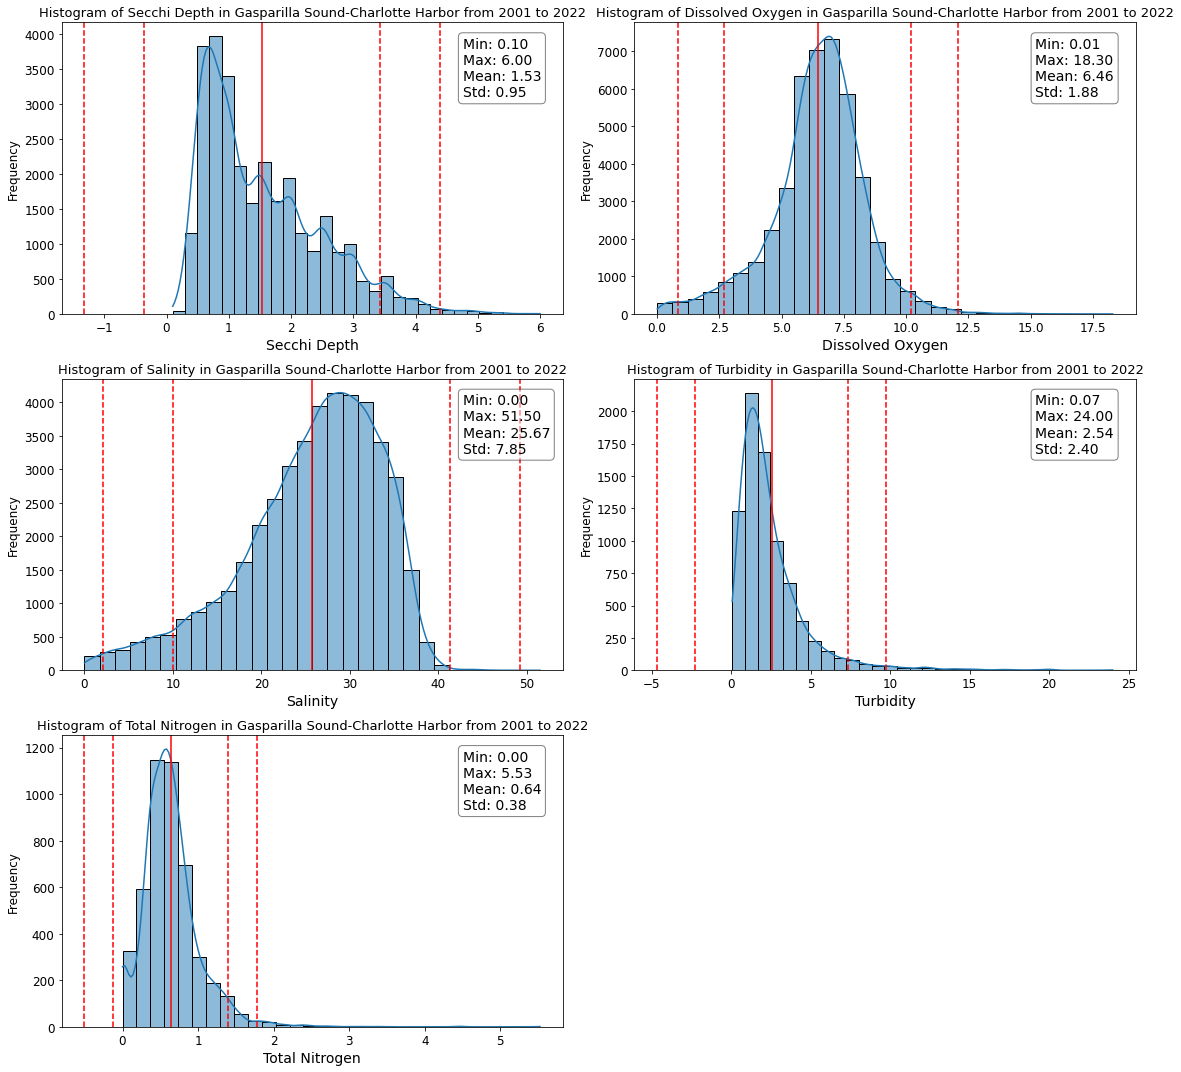

In [56]:
plot_histograms_statistics(dfAll_orig, 'Gasparilla Sound-Charlotte Harbor Aquatic Preserve', 2001, 2022)

## 3.2 Estero Bay <a class="anchor" id="reg_results_his_eb"></a>

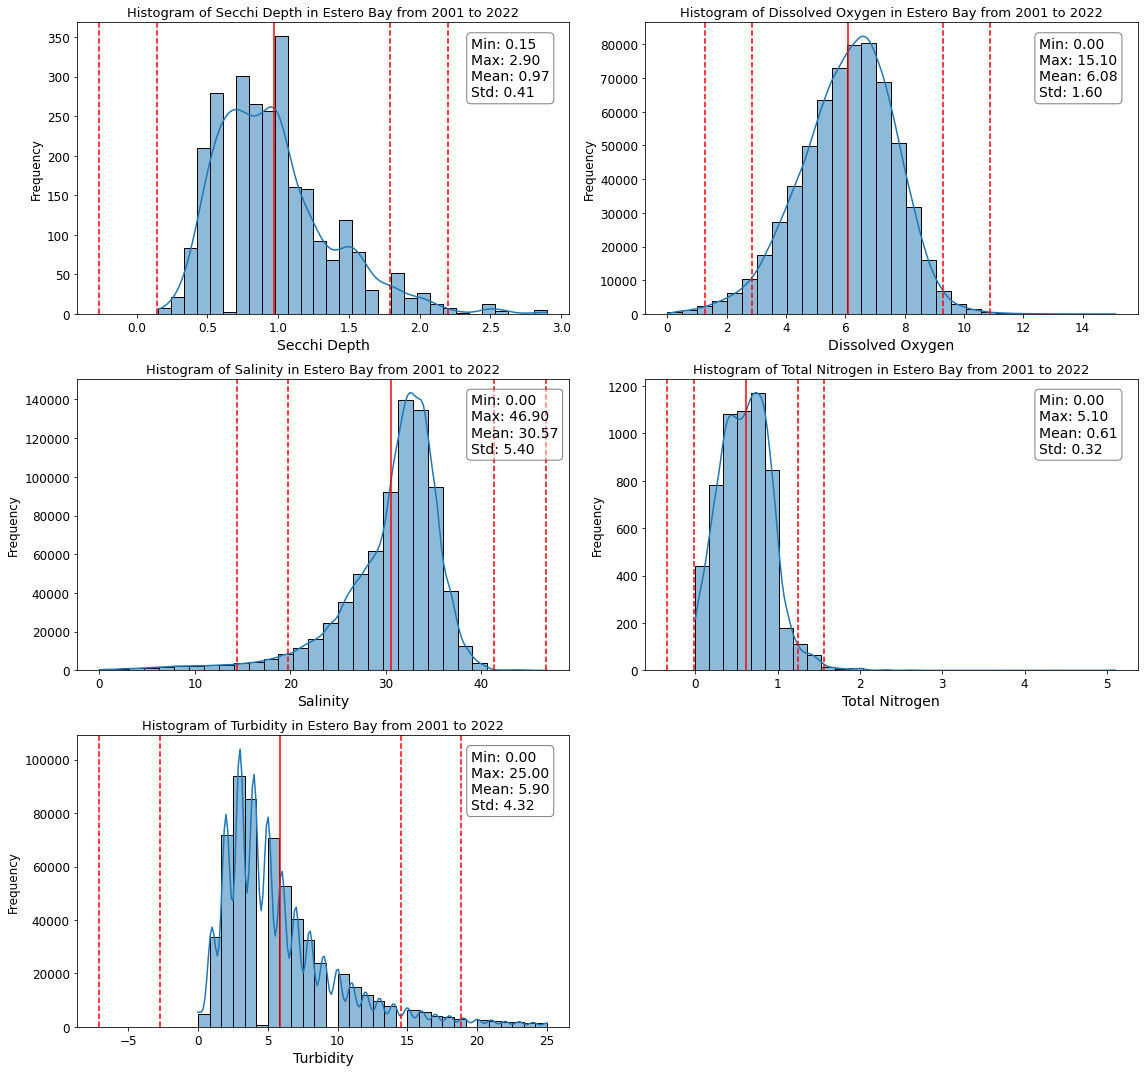

In [57]:
plot_histograms_statistics(dfAll_orig, 'Estero Bay Aquatic Preserve', 2001, 2022)

## 3.3 Big Bend <a class="anchor" id="reg_result_his_bb"></a>

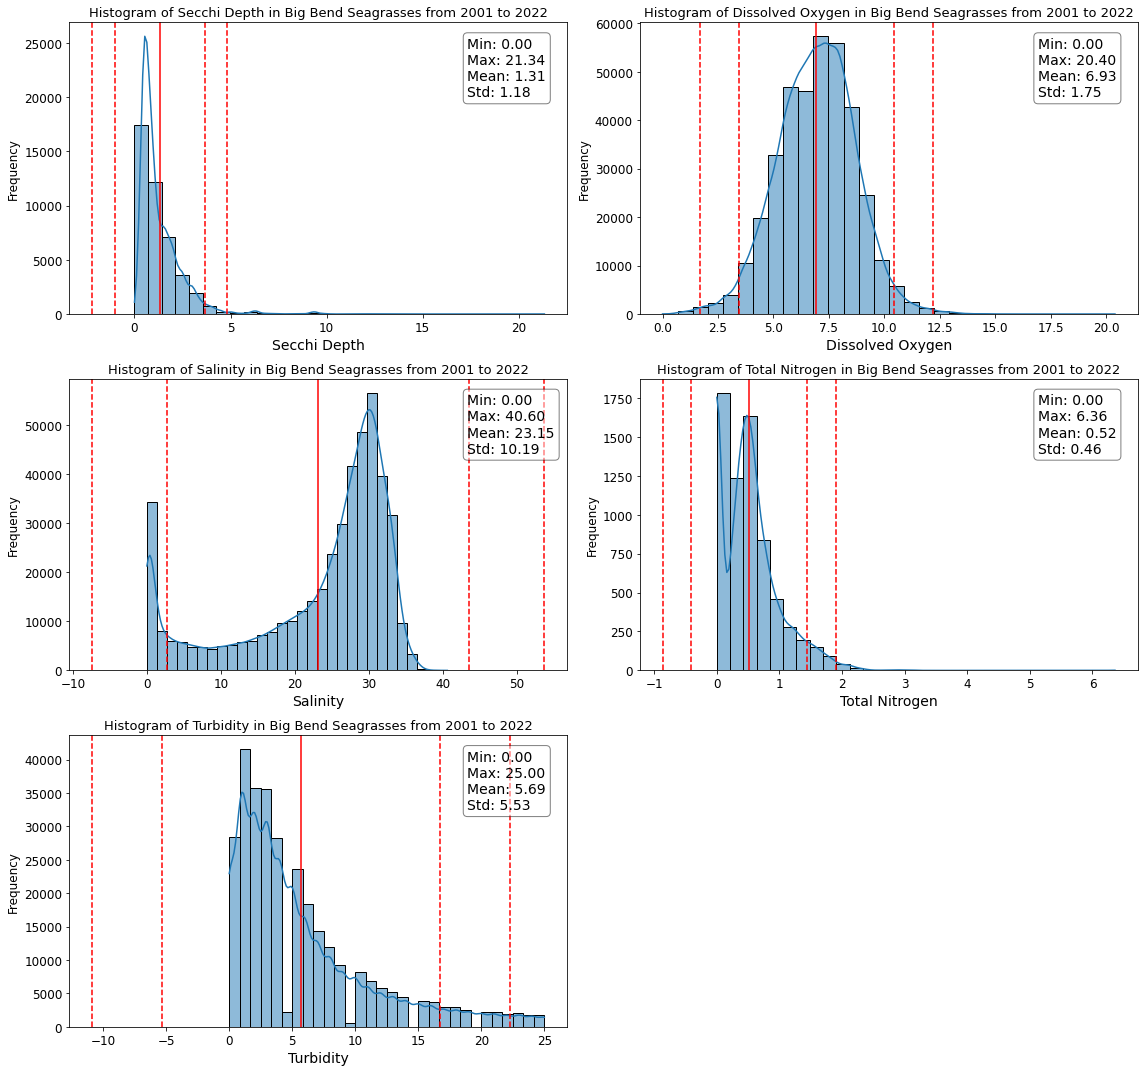

In [58]:
plot_histograms_statistics(dfAll_orig, 'Big Bend Seagrasses Aquatic Preserve', 2001, 2022)

## 3.4 Biscayne Bay <a class="anchor" id="reg_result_his_bbay"></a>

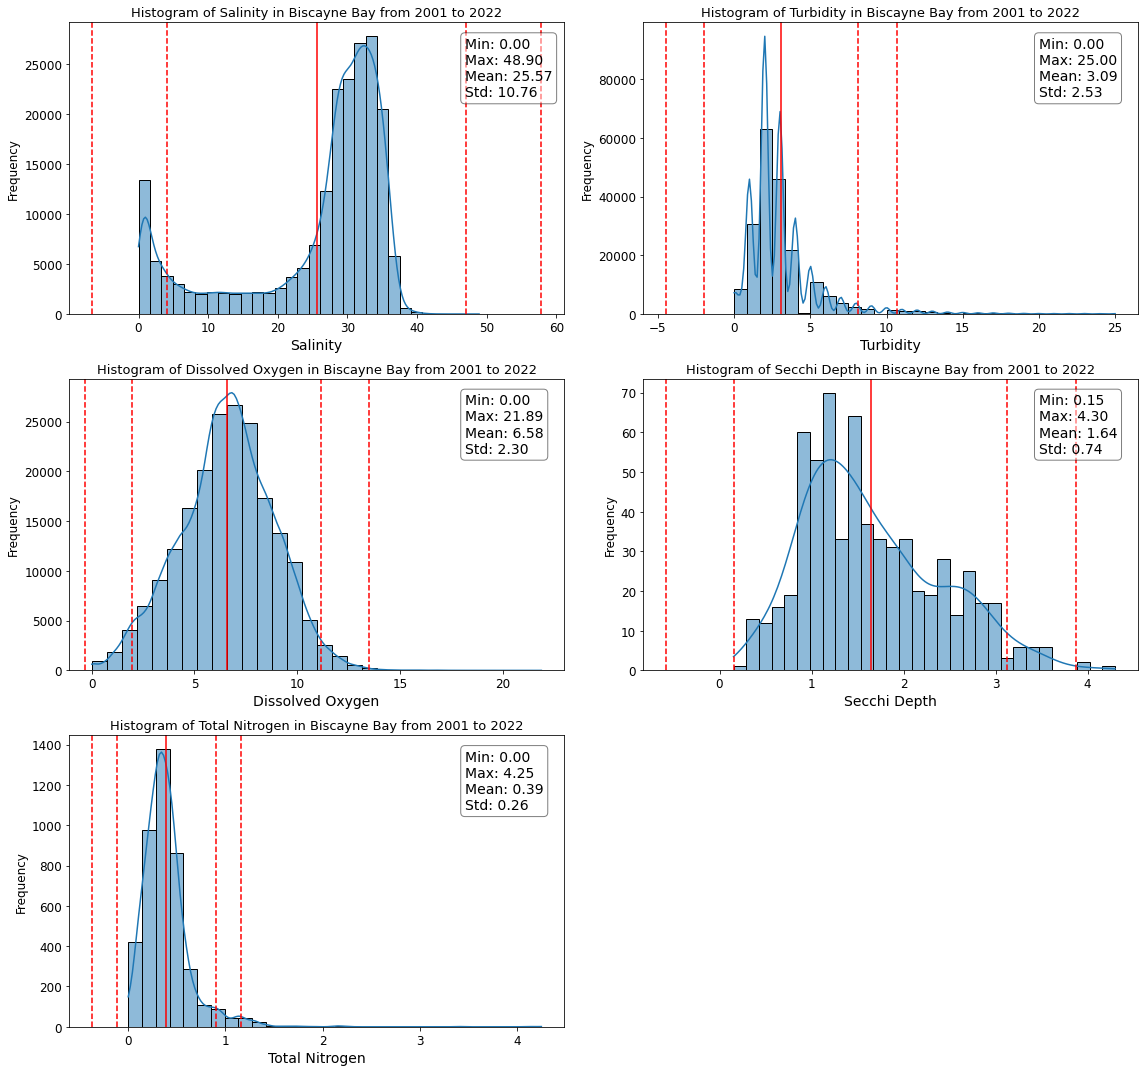

In [59]:
plot_histograms_statistics(dfAll_orig, 'Biscayne Bay Aquatic Preserve', 2001, 2022)

## 3.5 Guana Tolomato Matanzas NERR <a class="anchor" id="reg_result_his_gtm"></a>

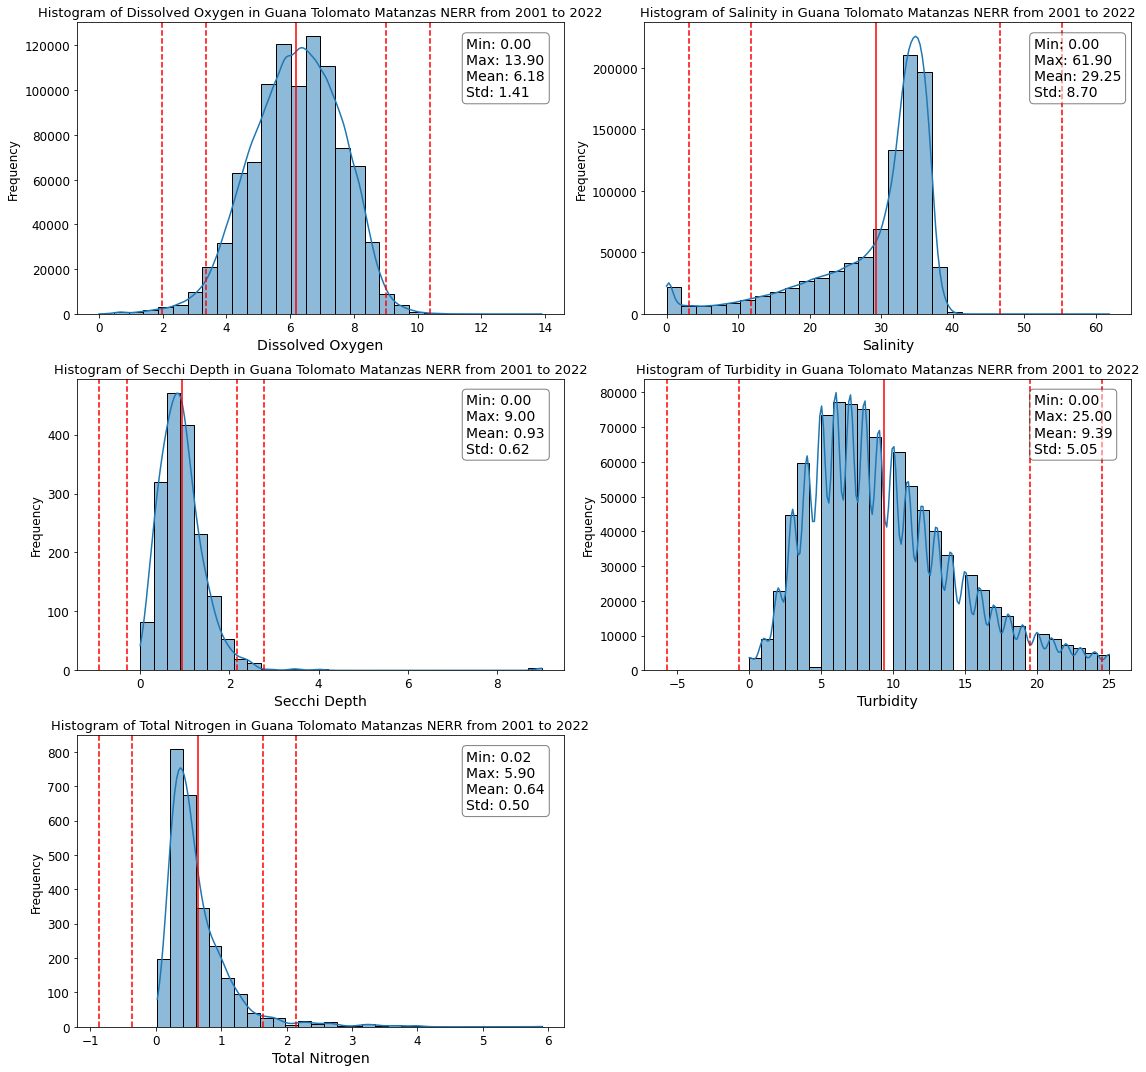

In [60]:
plot_histograms_statistics(dfAll_orig, 'Guana Tolomato Matanzas National Estuarine Research Reserve', 2001, 2022)

In [48]:
# Function to plot histogram without statistical information

# def plot_histograms(df, managed_area_name, start_year, end_year):
#     managed_area_short_name = area_shortnames.get(managed_area_name, managed_area_name)
    
#     filtered_df = df[(df['ManagedAreaName'] == managed_area_name) &
#                      (df['Year'] >= start_year) &
#                      (df['Year'] <= end_year)]
    
#     unique_parameters = filtered_df['ParameterName'].unique()
#     num_parameters = len(unique_parameters)
    
#     num_columns = 2
#     num_rows = np.ceil(num_parameters / num_columns).astype(int)
    
#     fig, axs = plt.subplots(num_rows, num_columns, figsize=(8*num_columns, 5*num_rows))
#     axs = axs.ravel() 
    
#     for i, parameter in enumerate(unique_parameters):
#         parameter_df = filtered_df[filtered_df['ParameterName'] == parameter]
#         sns.histplot(data=parameter_df, x='ResultValue', bins=30, kde=True, ax=axs[i])
#         axs[i].set_title(f'Histogram of {parameter} in {managed_area_short_name} from {start_year} to {end_year}')
#         axs[i].set_xlabel(parameter, fontsize=14)
#         axs[i].set_ylabel('Frequency')
    
#     # Remove unused subplots
#     for j in range(num_parameters, num_rows*num_columns):
#         fig.delaxes(axs[j])
    
#     plt.tight_layout()
#     plt.show()